<h1><center>CSE391  Data Science</center></h1>

<h1><center>Lecture 8</center></h1>
<h1><center>Sept 24th ,2018 </center></h1>

# Today Topics
1. Data Preprocessing 
  - dealing with outliers
  - some more features of Pandas
2. Data visualization methods


# Dealing with outliers

# Quantiles :
-  A quantile is where a sample is divided into equal-sized, adjacent, subgroups. 
- Quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities


- 2-quantile (median)
-The median is a quantile; the median is placed in a probability distribution so that exactly half of the data is lower than the median and half of the data is above the median. The median cuts a distribution into two equal areas 


 




## Difference between quantiles, quartiles, percentiles and deciles
- Quartiles are also quantiles; they divide the distribution into four equal parts. 
- Percentiles are quantiles that divide a distribution into 100 equal parts 
- Deciles are quantiles that divide a distribution into 10 equal parts.b

### How to Find Quantiles?
- Example: Find the number in the following set of data where 20 percent of values fall below it, and 80 percent fall above:
1 3 5 6 9 11 12 13 19 21 22 32 35 36 45 44 55 68 79 80 81 88 90 91 92 100 112 113 114 120 121 132 145 146 149 150 155 180 189 190

- Step 1: Order the data from smallest to largest. The data in the question is already in ascending order.
- Step 2: Count how many observations you have in your data set. this particular data set has 40 items.
- Step 3: Convert any percentage to a decimal for “q”. We are looking for the number where 20 percent of the values fall below it, so convert that to .2.
- Step 4: Insert your values into the formula:
    - ith observation = q (n + 1)
    - ith observation = .2 (40 + 1) = 8.2
-  The ith observation is at 8.2, so we round down to 8 (remembering that this formula is an estimate). The 8th number in the set is 13, which is the number where 20 percent of the values fall below it.

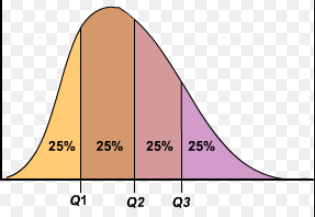

# How to find outliers:

- Using the Interquartile Range(IQR)


- Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
- High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
Where:
- Q1 = first quartile
- Q3 = third quartile
- IQR = Interquartile range
    - An outlier is defined as being any point of data that lies over 1.5 IQRs below the first quartile (Q1) or above the third quartile (Q3)in a data set.
    - High = (Q3) + 1.5 IQR
    - Low = (Q1) – 1.5 IQR
    
    
#### Sample Question: Find the outliers for the following data set: 3, 10, 14, 22, 19, 29, 70, 49, 36, 32.

- Step 1: Find the IQR, Q1(25th percentile) and Q3(75th percentile). 
    - IQR = 22
    - Q1 = 14
    - Q3 = 36
- Step 2: Multiply the IQR you found in Step 1 by 1.5:
    - IQR * 1.5 = 22 * 1.5 = 33.

- Step 3: Add the amount you found in Step 2 to Q3 from Step 1:
    - 33 + 36 = 69.
    
- Step 3: Subtract the amount you found in Step 2 from Q1 from Step 1:
    - 14 – 33 = -19.
    - This is your lower limit. Set this number aside for a moment.

###  Find outliers using boxplots
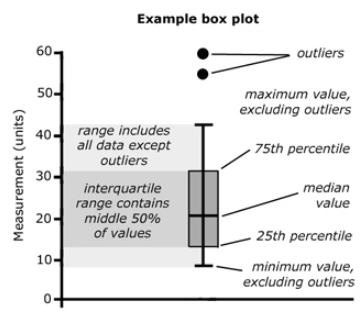


 - A point that is outside the lower whisker is considered a mild outlier while an extreme outlier is one that is beyond the upper whisker.  

## How to read a boxplot and find outliers
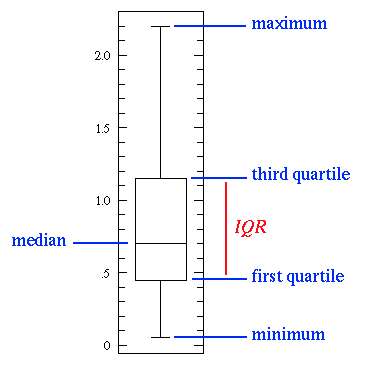

# How to detect and remove outliers using Pandas 

In [15]:
import pandas as pd 
import numpy as np

np.random.seed(33454)

## generate random samples
stepframe = pd.DataFrame({'a': np.random.randint(1, 200, 20), 
                          'b': np.random.randint(1, 200, 20),
                          'c': np.random.randint(1, 200, 20)})

stepframe[stepframe > 150] *= 10
print (stepframe)


### the quantiles
Q1 = stepframe.quantile(0.25)
Q3 = stepframe.quantile(0.75)
IQR = Q3 - Q1


upper_outlier = Q1 - 1.5 * IQR
lower_outlier = 1*5 * IQR - Q3

print(upper_outlier)
print(lower_outlier)

# excludes the outliers
# axis=1 because it is removing the specific row of the matrix
df = stepframe[~((stepframe < (Q1 - 1.5 * IQR)) |(stepframe > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df)

       a     b     c
0      4  1970    79
1    109    50   124
2   1570    87    41
3    137    60  1990
4     19   138   100
5     86    83   143
6     55    23    58
7     78   145    18
8    132    39    65
9     37   146  1970
10  1640    55  1560
11    32  1540  1570
12   132  1950    44
13    67   148  1880
14    95  1730    52
15   124   102    21
16    93    61    56
17    84    21    25
18    21  1650  1630
19    34    52   126
a     -98.375
b    -608.375
c   -2218.750
dtype: float64
a     322.75
b    1712.75
c    6000.00
dtype: float64
      a    b     c
1   109   50   124
3   137   60  1990
4    19  138   100
5    86   83   143
6    55   23    58
7    78  145    18
8   132   39    65
9    37  146  1970
13   67  148  1880
15  124  102    21
16   93   61    56
17   84   21    25
19   34   52   126


### Note that median, mean and mode might be different in a distribution
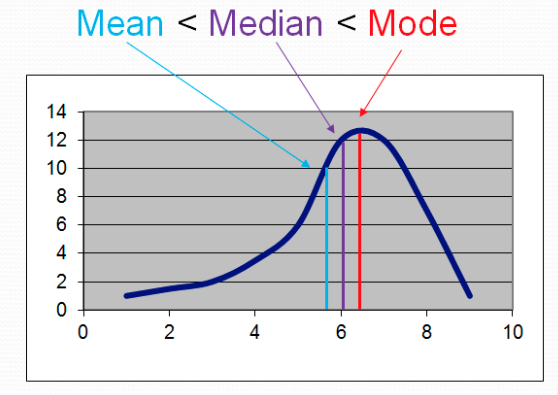

In [17]:
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Pivot tables in Pandas 
## Panada pivot table example

- A pivot table is a table that summarizes data from another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data. 

- Example 
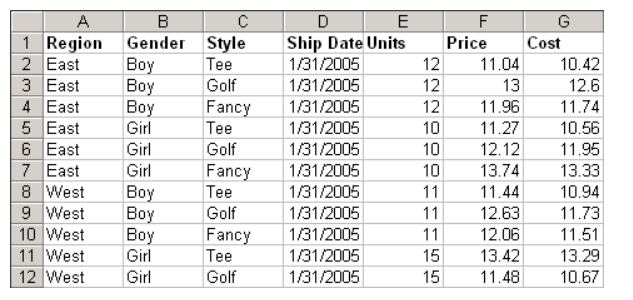

- The first question to ask is, "What am I seeking?" In the example here, let us ask, "How many Units did we sell in each Region for every Ship Date?":

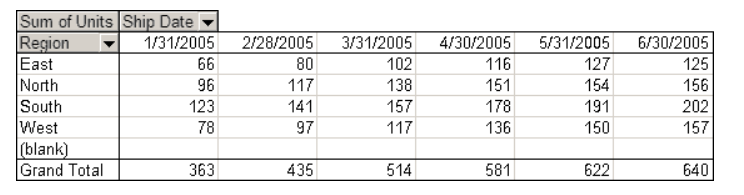
- Adapted from[Chris Moffitt](http://pbpython.com/pandas-pivot-table-explained.html)

In [20]:
# Read in the data; sale pipleline data
df = pd.read_excel("C:/Users/nafi/Downloads/sales-funnel.xlsx")
df

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [23]:
# This isn’t strictly required but helps us keep the order we want as we work through analyzing the data.

df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)


In [22]:
#The simplest pivot table must have a dataframe and an index . 
#In this case, let’s use the Name as our index.
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",737550.0,35000.0,1.000000
Herman LLC,141962.0,65000.0,2.000000
Jerde-Hilpert,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",307599.0,7000.0,3.000000
Keeling LLC,688981.0,100000.0,5.000000
Kiehn-Spinka,146832.0,65000.0,2.000000
Koepp Ltd,729833.0,35000.0,2.000000
Kulas Inc,218895.0,25000.0,1.500000


In [24]:
# You can have multiple indexes as well
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


In [25]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [26]:
 # the Account and Quantity columns aren’t really useful.
#Let’s remove it by explicitly defining the columns we care about using the values field.

pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [27]:
# The price column automatically averages the data 
# but we can do a count or a sum. Adding them is simple using aggfunc and np.sum .
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

- if we want to see sales broken down by the products, the columns variable allows us to define one or more columns.

In [ ]:
table = pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])
table


- Remember, columns are optional - they provide an additional way to segment the actual values you care about. The aggregation functions are applied to the values you list.

In [29]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
...                     columns=['C'], aggfunc=np.sum)

table

KeyError: 'D'

# Hierarchical Indexing (AKA multiple indexing) in Pandas
- adapted from  Python Data Science Handbook by [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html)

- Suppose you would like to track data about states from two different years. Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys:

In [30]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

- But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen:

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

- The Better Way: Pandas MultiIndex

In [12]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

- Notice that the MultiIndex contains multiple levels of indexing–in this case, the state names and the years, as well as multiple labels for each data point which encode these levels.

- If we re-index our series with this MultiIndex, we see the hierarchical representation of the data:

In [21]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [22]:
# Now to access all data for which the second index is 2010,
# we can simply use the Pandas slicing notation:

pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [23]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


# Join and Merge Pandas Dataframe
- adapted from [Chris Albon](https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/)

In [ ]:
#Create a dataframe
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

In [ ]:
# Create a second dataframe
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

- Join the two dataframes along rows

In [16]:
df_new = pd.concat([df_a, df_b])

df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


- Join the two dataframes along columns

In [17]:
pd.concat([df_a, df_b], axis=1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


## Data Visualization Methods
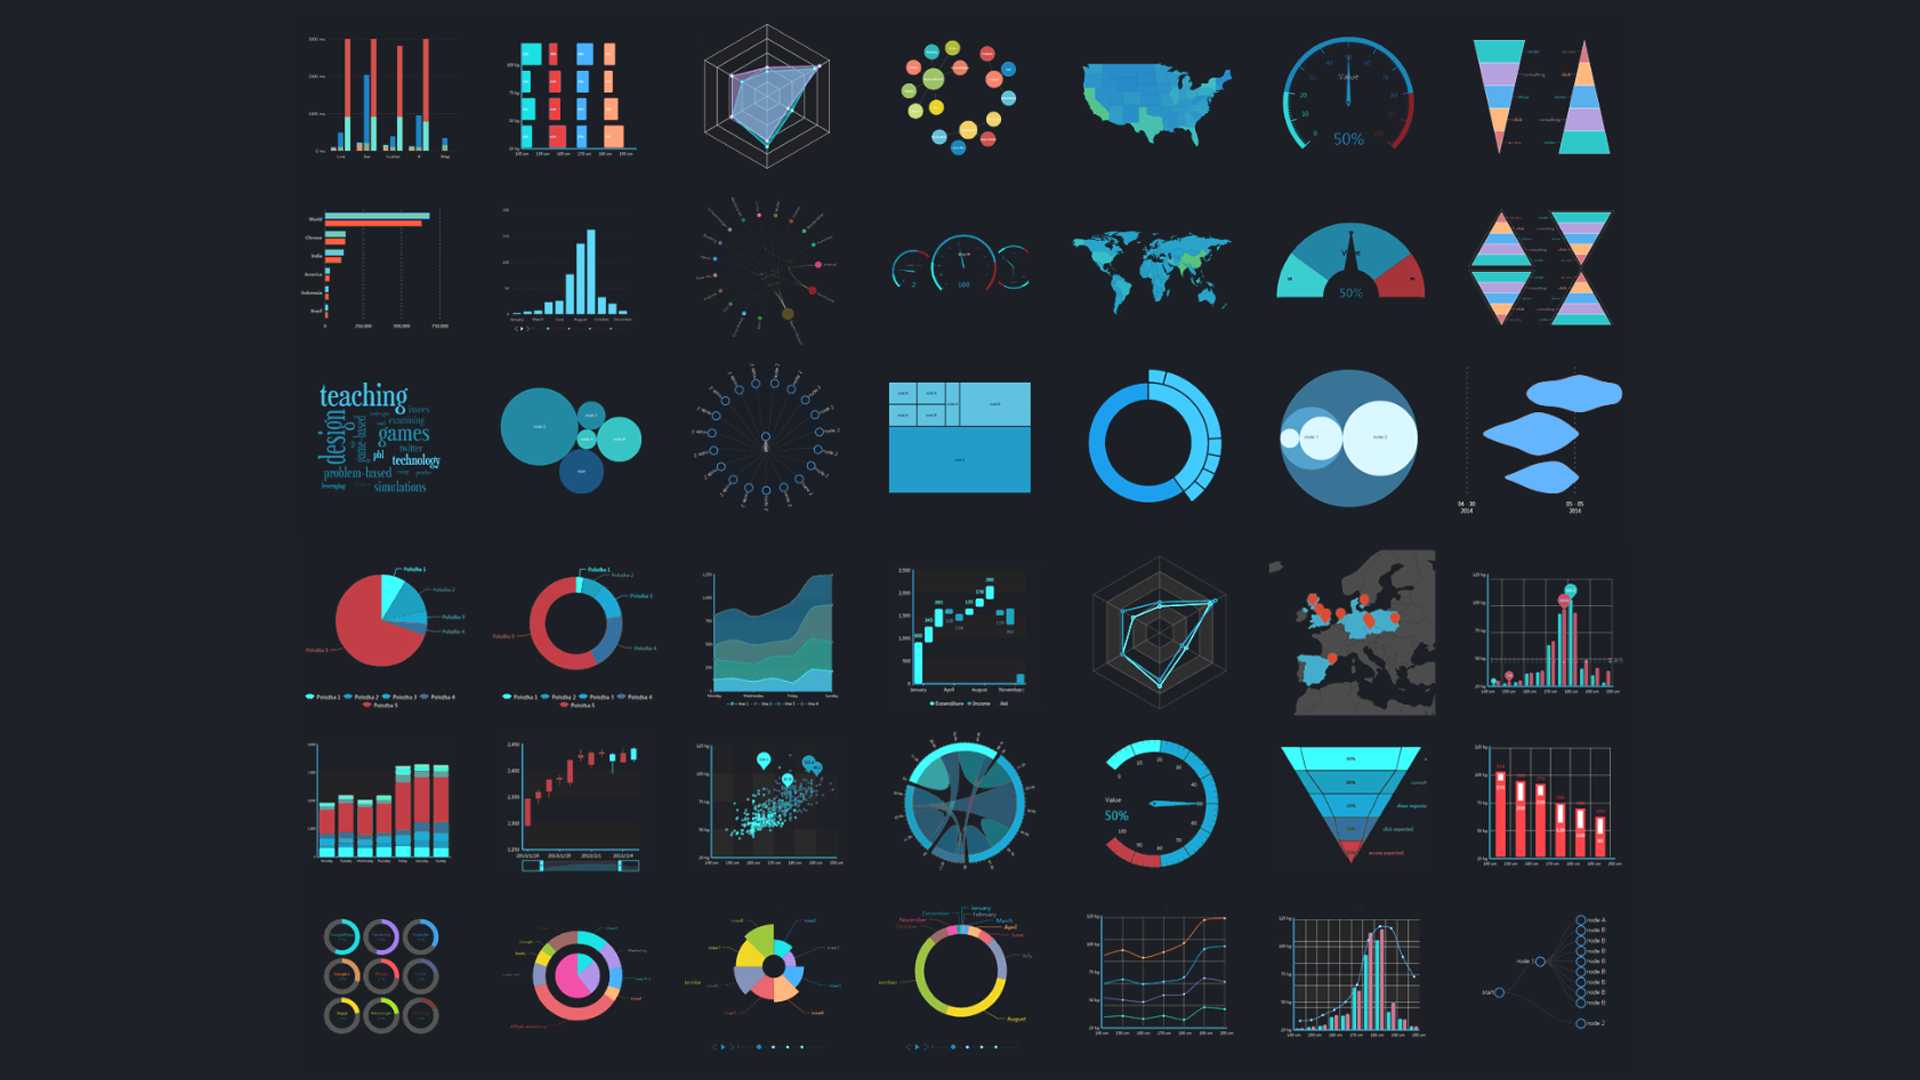
### First you need to ask this question what would you like to show
1. Relationship
2. Comparison
3. Composition
4. Distribution


## Examaples :
- Bar chart
- Histogram
- Scatter plots
- Network
- Heatmap
- Venn diagram
- Pie chart
- Time Series
- Dendrogram
- Ringchart
- boxplot
- Gantt Chart
- Word Cloud-
- Bubble Cloud/Chart
- Radar/Spider Chart
- Violin Plots

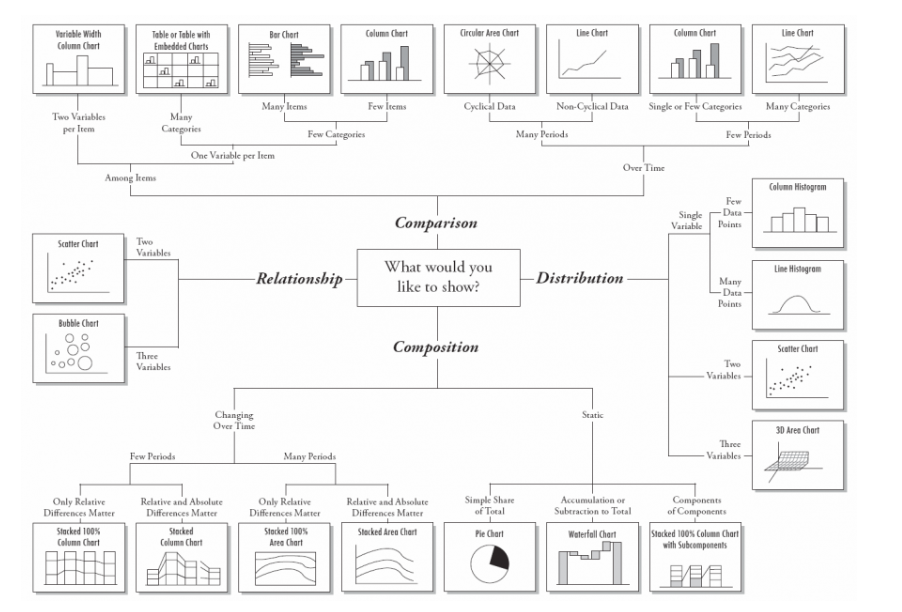

# The Best Python Data Visualization Libraries
[SRC](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/)

1. Matplotlib
- Many other libraries are built on top of Matplotlib and are designed to work in conjunction with analysis, it being the first Python data visualization library. The versatility of Matplotlib can be used to make many visualization types:-

    - Scatter plots
    - Bar charts and Histograms
    - Line plots
    - Pie charts
    - Stem plots
    - Contour plots
    - Quiver plots
    - Spectrograms

2. seaborn
    - Seaborn is a popular data visualization library that is built on top of Matplotlib. Seaborn’s default styles and color palettes are much more sophisticated than Matplotlib. Beyond that, Seaborn is a higher-level library, meaning it’s easier to generate certain kinds of plots, including heat maps, time series, and violin plots.
    
3. ggploy
    - Ggplot is a python visualization library based on R’s ggplot2 and the Grammar of Graphics. It lets you construct plots using high-level grammar without thinking about the implementation details. 
4. Bokeh

5. plotly
    - interactive and can access from notebook
6. Pygal
    - like Plotly and Bokeh, offers interactive plots that can be embedded in a web browser.
    
7. Geoplotlib
8. Missingno
    - good when have missing data
9. Leather 
    - designed to work with all data types and produces charts such as SVGs, so that they can be scaled without losing image quality

# Introduction to Matplotlib

The matplotlib provides a context, one in which one or more plots can be drawn before the image is shown or saved to file. The context can be accessed via functions on pyplot. The context can be imported as follows:

### Line plots

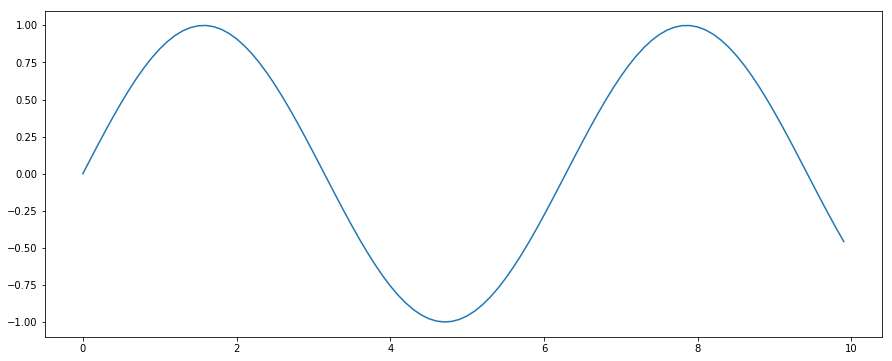

In [32]:
#There is some convention to import this context and name it plt;
# for example:


# example of a line plot
from numpy import sin
from matplotlib import pyplot
# consistent interval for x-axis
x = [x*0.1 for x in range(100)]
# function of x for y-axis
y = sin(x)
# create line plot
pyplot.plot(x, y)
# show line plot
pyplot.show()


### Bar Plots

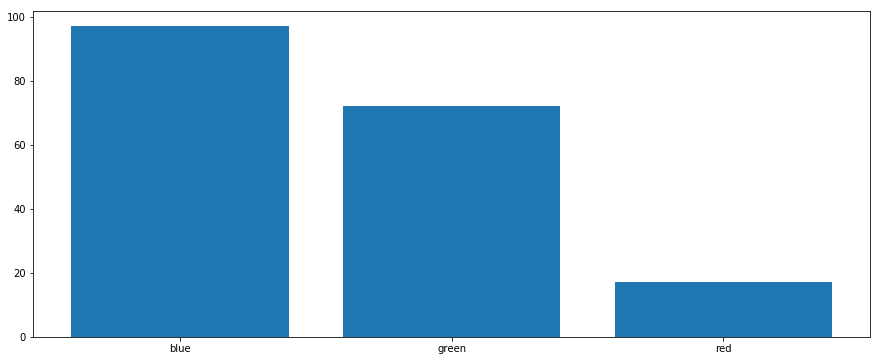

In [33]:
# example of a bar chart
from random import seed
from random import randint
from matplotlib import pyplot
# seed the random number generator
seed(1)
# names for categories
x = ['red', 'green', 'blue']
# quantities for each category
y = [randint(0, 100), randint(0, 100), randint(0, 100)]
# create bar chart
pyplot.bar(x, y)
# show line plot
pyplot.show()

### Histograms

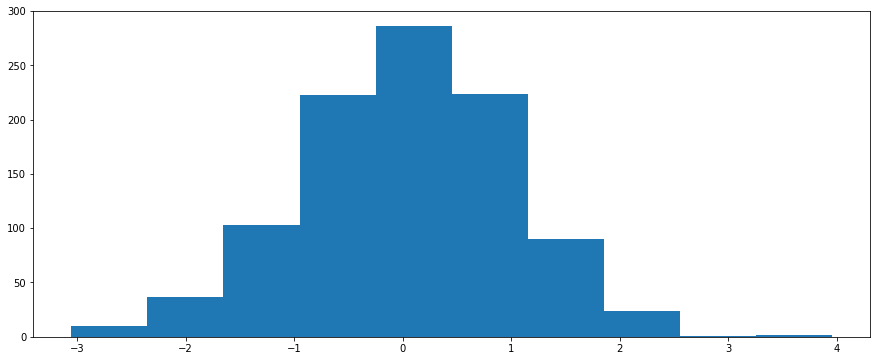

In [20]:
# example of a histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# random numbers drawn from a Gaussian distribution
x = randn(1000)
# create histogram plot
pyplot.hist(x)
# show line plot
pyplot.show()

# Box plots

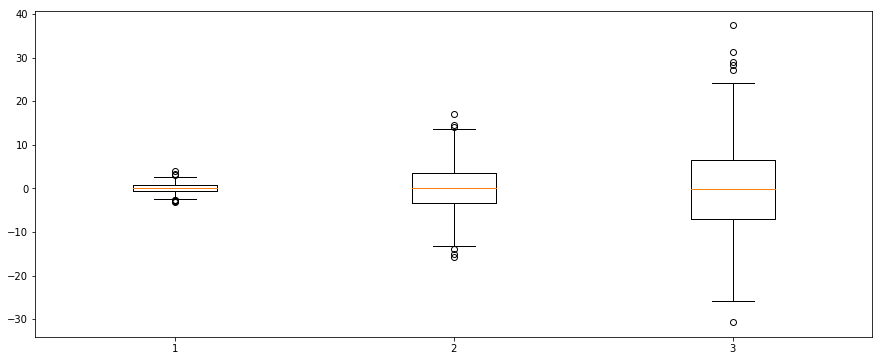

In [24]:
# example of a box and whisker plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# random numbers drawn from a Gaussian distribution
x = [randn(1000), 5 * randn(1000), 10 * randn(1000)]
# create box and whisker plot
pyplot.boxplot(x)
# show line plot
pyplot.show()


# Scatter plots

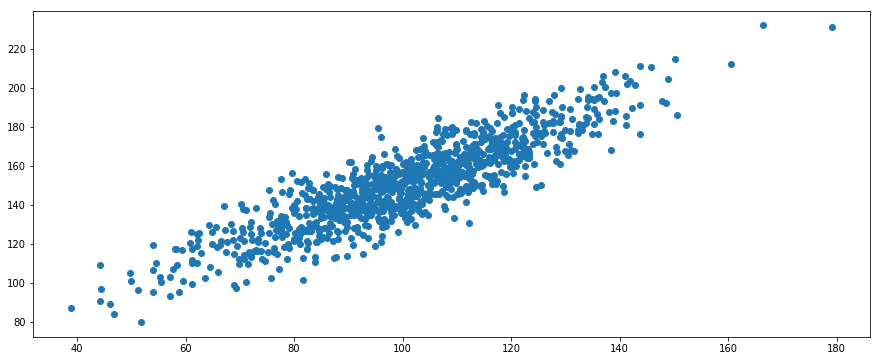

In [25]:
# example of a scatter plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# first variable
x = 20 * randn(1000) + 100
# second variable
y = x + (10 * randn(1000) + 50)
# create scatter plot
pyplot.scatter(x, y)
# show line plot
pyplot.show()